# Mask Generation with OpenCV
In the paper they generate irregular masks by using occlusion/dis-occlusion between two consecutive frames of videos, as described in [this paper](https://lmb.informatik.uni-freiburg.de/Publications/2010/Bro10e/sundaram_eccv10.pdf). 

Instead we'll simply be using OpenCV to generate some irregular masks, which will hopefully perform just as well. We've implemented this in the function `_generate_mask`, which is located in the `util.py` file in the libs directory

In [7]:
import os
import itertools
import matplotlib
import matplotlib.pyplot as plt

# Change to root path
if os.path.basename(os.getcwd()) != 'PConv-Keras':
    os.chdir('..')
    
# Import function that generates random masks
from libs.util import MaskGenerator

%matplotlib inline

Let us review of the code of this function

In [8]:
??MaskGenerator._generate_mask

Let's create some output samples with this function to see what it does

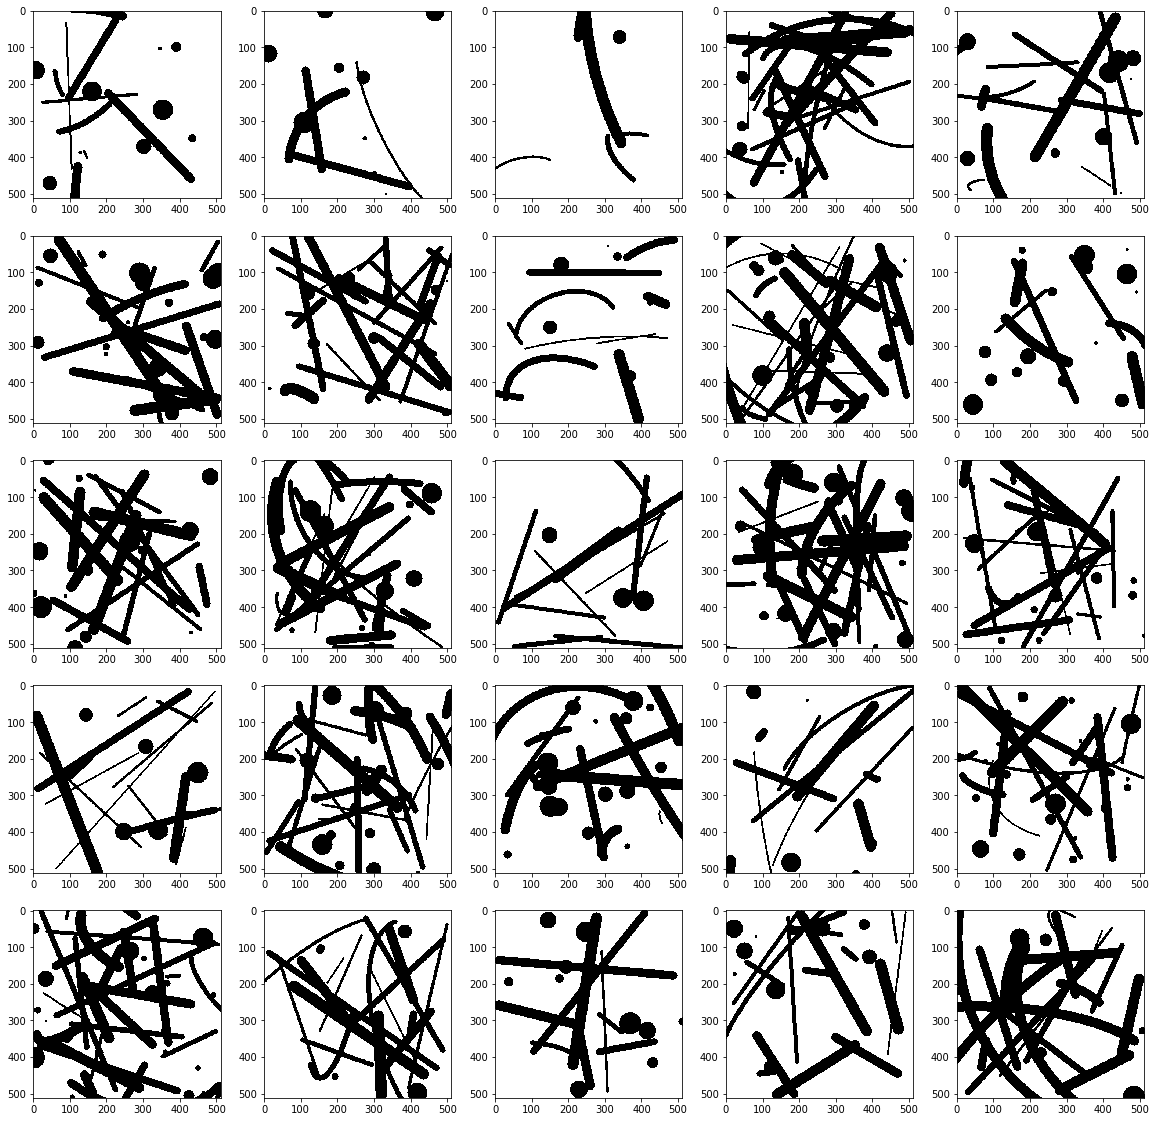

In [9]:
# Instantiate mask generator
mask_generator = MaskGenerator(512, 512, 3, rand_seed=42)

# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = mask_generator.sample()
    
    # Plot image on axis
    axes[i].imshow(img*255)

I've also implemented a function which will load masks from a directory, and potentially augments them. This can be used to load masks published with the original paper. E.g. get the original training and testing masks from http://masc.cs.gmu.edu/wiki/partialconv, and save them to `data/masks/train/` and `data/masks/test/`, respectively.

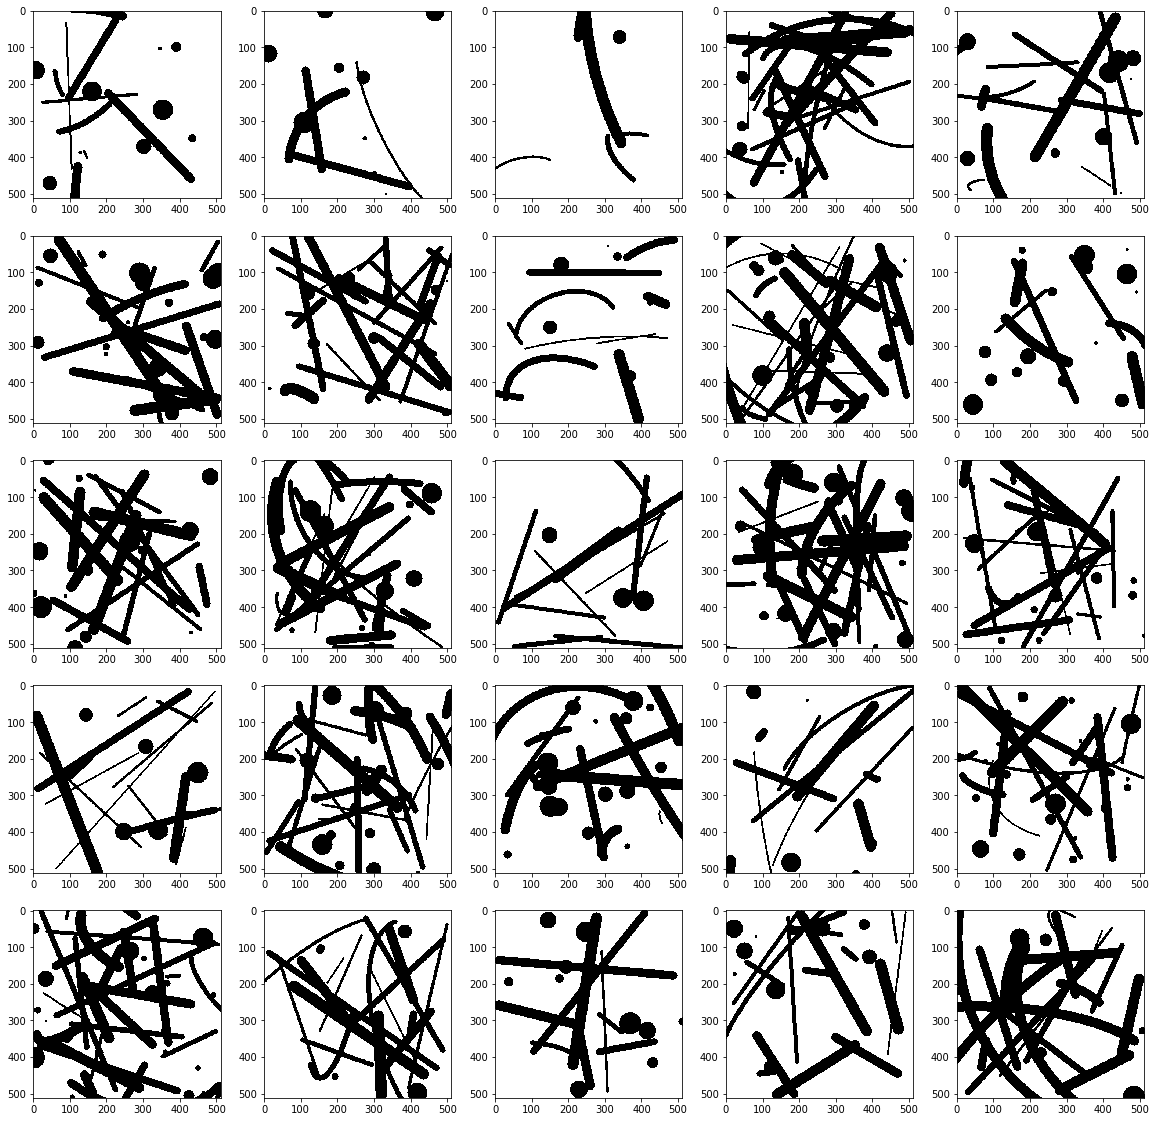

In [13]:
# Instantiate mask generator
mask_generator = MaskGenerator(512, 512, 3, rand_seed=42, filepath='')

# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = mask_generator.sample()
    
    # Plot image on axis
    axes[i].imshow(img*255)

In [14]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [15]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [16]:
import numpy as np
metal1_img = np.empty((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal1_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

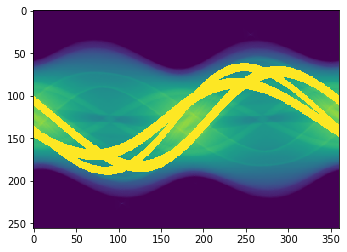

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal1_img)
plt.colorbar

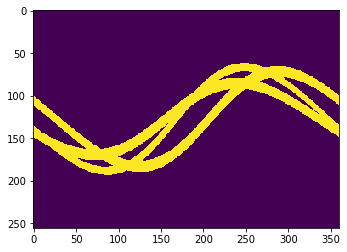

In [20]:
mask_generator = MaskGenerator(256, 360, 3, rand_seed=42)
mask_generator = metal1_img == 300
plt.imshow(mask_generator)